In [1]:
import torch 
import torch.nn as nn 
from torch.autograd import Variable 
import torch.utils.data as Data 
import torchvision 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import csv
import codecs
from sklearn.model_selection import cross_val_score,train_test_split

In [2]:


df = pd.read_csv(r"C:\Users\dyy\Desktop\12.csv")

In [3]:
def minmaxscaler(df):
    min = np.amin(df)
    max = np.amax(df)    
    return (df - min)/(max-min)

In [4]:
X = df.values[:, 0:8]
Y = df.values[:, 8:229]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(minmaxscaler(X), minmaxscaler(Y), test_size=0.2, random_state=42)

In [6]:
x_tra = torch.from_numpy(X_train)
x_tra = x_tra.float()
x_tes = torch.from_numpy(X_test)
x_tes = x_tes.float()
y_tra = torch.from_numpy(Y_train)
y_tra = y_tra.float()
y_tes = torch.from_numpy(Y_test)
y_tes = y_tes.float()

In [7]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(8, 1000),
            torch.nn.Sigmoid(),
            torch.nn.Linear(1000, 500),
            torch.nn.Sigmoid(),
            torch.nn.Linear(500, 221)
        )

        # init

    def forward(self, x):
        x = self.mlp(x)
        return x

In [8]:
lossData=[[]]
model = ANN()

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [12]:
loss_func = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), 0.0001)
batch_size = 64
epochs = 30000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print("epoch\t loss\t")
losses = []
for i in range(epochs):
     batch_loss = []
    # start和end分别是提取一个batch数据的起始和终止下标
     for start in range(0, len(x_tra), batch_size):
        end = start + batch_size if start + batch_size < len(x_tra) else len(x_tra)
        xx = torch.tensor(x_tra[start:end], dtype = torch.float, requires_grad = False).to(device)
        yy = torch.tensor(y_tra[start:end], dtype = torch.float, requires_grad = False).to(device)
        predict = model(xx)
        loss =loss_func(predict, yy)
        optim.zero_grad()
        loss.backward()
        optim.step()
        batch_loss.append(loss.data.cpu().numpy())
    
    # 每隔100步输出一下损失值（loss）
     if i % 100==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

epoch	 loss	


<ipython-input-12-988fed3d0eb2>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx = torch.tensor(x_tra[start:end], dtype = torch.float, requires_grad = False).to(device)
<ipython-input-12-988fed3d0eb2>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yy = torch.tensor(y_tra[start:end], dtype = torch.float, requires_grad = False).to(device)


0 0.8315912
100 0.1110879
200 0.013512762
300 0.002641725
400 0.0015560699
500 0.0014517148
600 0.0014411161
700 0.001439862
800 0.0014396722
900 0.0014396304
1000 0.0014396205
1100 0.0014396142
1200 0.0014396089
1300 0.001439613
1400 0.0014396132
1500 0.001439616
1600 0.001439618
1700 0.0014396192
1800 0.0014396225
1900 0.0014396207
2000 0.001439623
2100 0.0014396292
2200 0.0014396283
2300 0.0014396295
2400 0.0014396334
2500 0.0014396355
2600 0.0014396395
2700 0.0014396401
2800 0.0014396415
2900 0.0014396424
3000 0.0014396457
3100 0.0014396468
3200 0.0014396455
3300 0.0014396453
3400 0.0014396498
3500 0.0014396525
3600 0.0014396494
3700 0.0014396491
3800 0.0014396447
3900 0.0014396433
4000 0.0014396401
4100 0.0014396382
4200 0.0014396389
4300 0.0014396362
4400 0.0014396309
4500 0.0014396291
4600 0.0014396278
4700 0.0014396217
4800 0.0014396167
4900 0.0014396148
5000 0.0014396126
5100 0.0014396094
5200 0.0014396072
5300 0.0014396105
5400 0.0014396063
5500 0.0014396051
5600 0.001439611


In [21]:
test=pd.DataFrame(data=losses)
test.to_csv('./loss_ANN.csv',encoding='gbk')

In [29]:
torch.save(model,"ANN.pth")

Text(0, 0.5, 'loss')

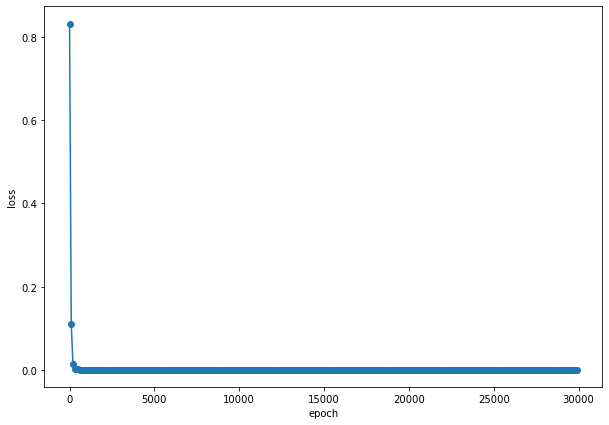

In [30]:
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses))*100,losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('loss')

In [24]:
predicted = model(x_tes.to(device))

predicted = predicted.detach().cpu().numpy()

 
# 计算误差
result =abs(np.mean(predicted- Y_test))
print("The mean error of linear regression:")
print(result)

The mean error of linear regression:
5.5786833254724325e-05


In [10]:
model_dict=torch.load("ANN.pth")

In [15]:
r = [0.9873, 0.3418, 0.4334, 0.0633, 0.0380, 0.0253, 0.0500, 0.3418]
r=torch.Tensor(r)
yyy= [0.9955, 0.9884, 0.9806, 0.9722, 0.9631, 0.9532, 0.9425, 0.9309, 0.9183,
        0.9046, 0.8897, 0.8733, 0.8552, 0.8352, 0.8126, 0.7867, 0.7564, 0.7194,
        0.6714, 0.6000, 0.4415, 0.5034, 0.5975, 0.6411, 0.6667, 0.6827, 0.6926,
        0.6980, 0.6999, 0.6992, 0.6964, 0.6923, 0.6883, 0.6859, 0.6871, 0.6932,
        0.7040, 0.7180, 0.7334, 0.7490, 0.7641, 0.7783, 0.7915, 0.8036, 0.8148,
        0.8252, 0.8347, 0.8435, 0.8516, 0.8592, 0.8662, 0.8728, 0.8788, 0.8845,
        0.8897, 0.8946, 0.8991, 0.9033, 0.9071, 0.9106, 0.9138, 0.9167, 0.9194,
        0.9217, 0.9237, 0.9255, 0.9271, 0.9284, 0.9294, 0.9303, 0.9309, 0.9313,
        0.9315, 0.9315, 0.9313, 0.9309, 0.9303, 0.9295, 0.9284, 0.9271, 0.9256,
        0.9237, 0.9215, 0.9190, 0.9162, 0.9130, 0.9094, 0.9053, 0.9008, 0.8957,
        0.8901, 0.8840, 0.8771, 0.8695, 0.8611, 0.8517, 0.8412, 0.8294, 0.8160,
        0.8005, 0.7823, 0.7604, 0.7336, 0.6999, 0.6588, 0.6261, 0.6420, 0.6829,
        0.7188, 0.7469, 0.7689, 0.7864, 0.8004, 0.8116, 0.8203, 0.8271, 0.8321,
        0.8355, 0.8374, 0.8381, 0.8375, 0.8358, 0.8330, 0.8294, 0.8251, 0.8203,
        0.8153, 0.8103, 0.8059, 0.8022, 0.7996, 0.7984, 0.7983, 0.7994, 0.8015,
        0.8044, 0.8079, 0.8118, 0.8162, 0.8207, 0.8253, 0.8297, 0.8336, 0.8369,
        0.8393, 0.8407, 0.8412, 0.8408, 0.8395, 0.8377, 0.8356, 0.8334, 0.8315,
        0.8302, 0.8297, 0.8303, 0.8322, 0.8354, 0.8397, 0.8450, 0.8509, 0.8572,
        0.8636, 0.8696, 0.8752, 0.8801, 0.8842, 0.8875, 0.8897, 0.8911, 0.8915,
        0.8911, 0.8900, 0.8883, 0.8862, 0.8839, 0.8816, 0.8795, 0.8775, 0.8759,
        0.8746, 0.8735, 0.8725, 0.8715, 0.8701, 0.8680, 0.8649, 0.8607, 0.8555,
        0.8498, 0.8445, 0.8408, 0.8401, 0.8430, 0.8495, 0.8583, 0.8680, 0.8777,
        0.8866, 0.8944, 0.9011, 0.9069, 0.9119, 0.9163, 0.9204, 0.9244, 0.9283,
        0.9321, 0.9359, 0.9395, 0.9429, 0.9461, 0.9492, 0.9521, 0.9546, 0.9569,
        0.9589, 0.9609, 0.9629, 0.9650, 0.9669]
yyy=torch.Tensor(yyy)

Text(0, 0.5, 's11')

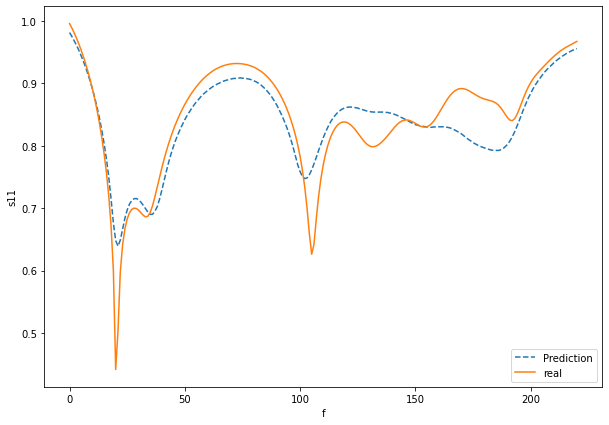

In [16]:
i = 1000

X_ver = minmaxscaler(X_test)[i,]
Y_ver = minmaxscaler(Y_test)[i,]

x_ver = torch.from_numpy(X_ver)
x_ver = x_ver.float()
y_ver = torch.from_numpy(Y_ver)
y_ver = y_ver.float()

predicted1 = model_dict(r.to(device))
predicted1 = predicted1.detach().cpu().numpy()
fig, ax = plt.subplots(figsize = (10, 7))
#plt.scatter(x_ver[: ,2],predicted1)
#plt.scatter(x_ver[: ,2],y_ver)
ax.plot(predicted1, label='Prediction', linestyle = '--')
ax.plot(yyy, label='real', linestyle = '-')
#ax.plot(y_ver, label='Y2', linestyle = '-')
ax.legend()
ax.set_xlabel('f')
ax.set_ylabel('s11')
#print(predicted1)

In [23]:
torch.save(model,"ANN.pth")

In [17]:
def fan_minmaxscaler(x,df):
    min = np.amin(df)
    max = np.amax(df)    
    return x*(max-min)+ min

In [18]:
e = fan_minmaxscaler(predicted1,Y)

In [19]:
test=pd.DataFrame(data=e)


test.to_csv('./ann_predicted1.csv',encoding='gbk')
